<center>

# **LAB 1**

# **DATA RELATIONSHIP**



</center>

<center>

# **Mục lục** <a name = "TOC"></a>

</center>

- [1. Giới thiệu thành viên](#section1)
- [2. Các thư viện sử dụng](#section2)
- [3. Mô tả dữ liệu](#section3)
- [4. Giới thiệu thuộc tính và ý nghĩa](#section4)
- [5. Xử lý dữ liệu](#section5)
    - [5.1. Đọc dữ liệu vào Dataframe](#section5_1)
    - [5.2. Số dòng và số cột của tập dữ liệu](#section5_2)
    - [5.3. Ý nghĩa của mỗi dòng](#section5_3)
    - [5.4. Kiểm tra các dòng bị trùng lắp](#section5_4)
    - [5.5. Ý nghĩa của mỗi cột](#section5_5)
    - [5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp](#section5_6)
    - [5.7. Tìm sự phân phối của các cột dữ liệu kiểu số](#section5_7)
    - [5.8. Tìm sự phân phối của các cột dữ liệu phân loại](#section5_8)
    - [5.9. Xử lý các dòng bị thiếu dữ liệu](#section5_9)
- [6. Phân tích dữ liệu](#section6)
    - [6.1. Câu hỏi số 1](#section6_1)
    - [6.2. Câu hỏi số 2](#section6_2)
    - [6.3. Câu hỏi số 3](#section6_3)
    - [6.4. Câu hỏi số 4](#section6_4)
    - [6.5. Câu hỏi số 4](#section6_5)
- [7. Đôi điều về đồ án](#section7)
- [8. Các nguồn tham khảo](#section8)

# **1. Giới thiệu thành viên** <a name = "section1"></a>
[Quay về mục lục](#TOC)

---

# **2. Các thư viện sử dụng** <a name = "section2"></a>
[Quay về mục lục](#TOC)

In [261]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import statsmodels.api as sm
sns.set()

---

# **3. Mô tả dữ liệu** <a name = "section3"></a>
[Quay về mục lục](#TOC)

---

# **4. Giới thiệu thuộc tính và ý nghĩa** <a name = "section4"></a>
[Quay về mục lục](#TOC)

add data crawling code here

---

# **5. Xử lý dữ liệu** <a name = "section5"></a>
[Quay về mục lục](#TOC)

## 5.1. Đọc dữ liệu vào Dataframe <a name = "section5_1"></a>
[Quay về mục lục](#TOC)

In [262]:
try:
    covid19_df = pd.read_csv("covid19_05_03_2023.csv", 
            usecols=lambda x: x != 'index'
                )
except:
    covid19_df = pd.read_csv("covid19_05_03_2023.csv")
covid19_df.head()

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
def preprocess(df):
    df['country_other'] = df['country_other'].str.strip()
    df = df[df['country_other']!='']
    df_ = df.copy()
    df_.replace(to_replace = r'\D',value = '',regex=True,inplace = True)
    df_.iloc[:,0] = df.iloc[:,0]
    df_['continent'] = df['continent']
    return df_

In [264]:
try :
    covid19_df = preprocess(covid19_df)
    covid19_df.to_csv('covid19_05_03_2023.csv', index=False)
    covid19_df = pd.read_csv('covid19_05_03_2023.csv')
except:
    pass
covid19_df.head()

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


## 5.2. Số dòng và số cột của tập dữ liệu <a name = "section5_2"></a>
[Quay về mục lục](#TOC)

In [265]:
row = covid19_df.shape[0]
col = covid19_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)
covid19_df.head()

Số dòng: 246
Số cột 21


,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


## 5.3. Ý nghĩa của mỗi dòng <a name = "section5_3"></a>
[Quay về mục lục](#TOC)

## 5.4. Kiểm tra các dòng bị trùng lắp <a name = "section5_4"></a>
[Quay về mục lục](#TOC)

In [266]:
duplicated = covid19_df.duplicated()
pd.DataFrame(covid19_df[duplicated==True])

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop


## 5.5. Ý nghĩa của mỗi cột <a name = "section5_5"></a>
[Quay về mục lục](#TOC)

## 5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp <a name = "section5_6"></a>
[Quay về mục lục](#TOC)

In [267]:
covid19_df.dtypes

country_other           object
totalcases               int64
newcases               float64
totaldeaths            float64
newdeaths              float64
totalrecovered         float64
newrecovered           float64
activecases            float64
serious_critical       float64
tot_cases_1m_pop       float64
deaths_1m_pop          float64
totaltests             float64
tests_1m_pop           float64
population             float64
continent               object
1_caseevery_x_ppl      float64
1_deathevery_x_ppl     float64
1_testevery_x_ppl      float64
new_cases_1m_pop       float64
new_deaths_1m_pop      float64
active_cases_1m_pop    float64
dtype: object

## 5.7. Tìm sự phân phối của các cột dữ liệu kiểu số <a name = "section5_7"></a>
[Quay về mục lục](#TOC)

## 5.8. Tìm sự phân phối của các cột dữ liệu phân loại <a name = "section5_8"></a>
[Quay về mục lục](#TOC)

## 5.9. Xử lý các dòng bị thiếu dữ liệu <a name = "section5_9"></a>
[Quay về mục lục](#TOC)

---

# **6. Phân tích dữ liệu** <a name = "section6"></a>
[Quay về mục lục](#TOC)

## 6.1. Câu hỏi số 1 <a name = "section6_1"></a>
[Quay về mục lục](#TOC)

In [268]:
radar_data = covid19_df[['totalcases','totaldeaths','totalrecovered','activecases']].iloc[:6,:]
radar_data['Total Deaths / Total Cases'] = radar_data['totaldeaths'] / radar_data['totalcases'] * 100
scale = StandardScaler()
data_ = scale.fit_transform(radar_data)
data_

array([[ 0.12342042,  0.65340255,  0.12651901, -0.06302365,  0.18284396],
       [ 1.10541827,  0.55078052,  1.02764118,  2.17564575, -0.67620962],
       [ 1.45638951,  1.20902375,  1.51742483, -0.19927355, -0.52384361],
       [-0.49659983,  0.29602423, -0.48552494, -0.62362448,  1.21526247],
       [-1.08764465, -1.51331458, -1.08291505, -0.67864123, -1.46621735],
       [-1.10098372, -1.19591645, -1.10314503, -0.61108284,  1.26816415]])

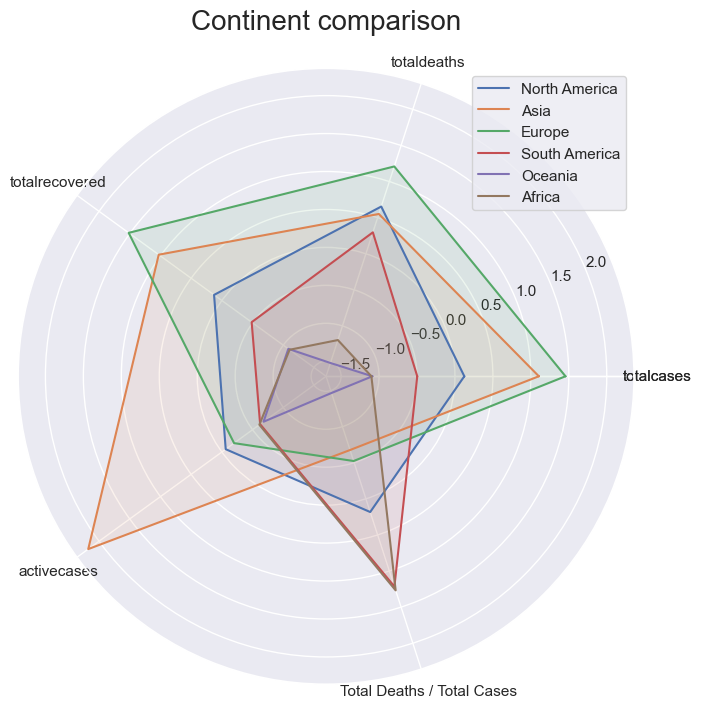

In [269]:
categories = radar_data.columns
categories = [*categories, categories[0]]
radar_ = []
for i in range(6):
    radar_.append([*data_[i],data_[i][0]])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(radar_[0]))

label = ['North America','Asia','Europe','South America','Oceania','Africa']

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(6):
    plt.plot(label_loc, radar_[i], label=label[i])
    plt.fill(label_loc,radar_[i],alpha = 0.1)

plt.title('Continent comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()


Dựa vào radar chart trên ta thấy một số điểm đặc biệt :
- Mặc dù tổng số ca nhiễm ở Châu Phi thấp nhất thế giới tuy nhiên tỉ lệ tử vong hiện tại lại cao nhất thế giới. Điều đó cho thấy nền y tế của Châu Phi tương đối kém phát triển so với các nước khác.
- Số ca nhiễm hiện tại cao nhất là ở Châu Á mặc dù tổng số ca nhiễm ở khu vực này không cao nhất thế giới và hiện tại tỉ lệ tử vong của khu vực này thấp thứ 2 toàn thế giới.
- Châu Âu là khu vực tổng ca nhiễm cao nhất thế giới đi kèm với việc đó là tổng người tử vong và tổng lượng người bình phục cũng cao nhất. Mặc dù có tổng số người tử vong cao nhất thế giới nhưng tỉ lệ tử vong ở khu vực cũng chỉ đứng thứ 4 trên 6 châu lục. Ngoài ra số ca đang mắc bệnh hiện tại của Châu Âu cũng tương đối thấp (Sau Châu Á và Bắc Mĩ), điều đó cho thấy Châu Âu đã phần nào kiểm soát được tình hình dịch bệnh.
- Nam Mỹ cũng thuộc về trường hợp khá tương đồng với Châu Phi mặc dù số ca nhiễm không thuộc vào hàng cao nhất thế giới nhưng tỉ lệ tử vong lại rất cao.
- Châu Đại Dương mọi đặc điểm hầu như thấp nhất trong tất cả khu vực, câu trả lời hợp lý nhất cho hiện tượng này có vẻ do tổng dân số khu vực này thấp, công tác chống dịch cũng như y tế khu vực này tốt.

## 6.2. Câu hỏi số 2 <a name = "section6_2"></a>
[Quay về mục lục](#TOC)

## 6.3. Câu hỏi số 3 <a name = "section6_3"></a>
[Quay về mục lục](#TOC)

## 6.4. Câu hỏi số 4 MOVE THIS QUESTION TO 1<a name = "section6_4"></a>
[Quay về mục lục](#TOC)

In [270]:

df = covid19_df[covid19_df['country_other'] == 'Total:'].reset_index()

In [271]:
df_world = df[df['continent']=='All' ]
df_world = df_world[['totalcases','totaldeaths', 'totalrecovered', 'activecases']].rename(index={7: "num"})
df_world = df_world.T
df_world

,num
totalcases,680656727.0
totaldeaths,6805186.0
totalrecovered,653493870.0
activecases,20357671.0


In [272]:
df_world['percent'] = (df_world['num'] / df_world['num'][0]) *100
df_world

,num,percent
totalcases,680656727.0,100.000000
totaldeaths,6805186.0,0.999797
totalrecovered,653493870.0,96.009316
activecases,20357671.0,2.990887


In [273]:
df['percent1'] = (df['totalrecovered'] / df['totalrecovered'].loc[7]) *100
df['percent2'] = (df['totaldeaths'] / df['totaldeaths'].loc[7]) *100
df['percent3'] = (df['activecases'] / df['activecases'].loc[7]) *100
df['percent1']

0     18.366192
1     30.471060
2     37.050375
3     10.144541
4      2.119737
5      1.847986
6      0.000108
7    100.000000
Name: percent1, dtype: float64

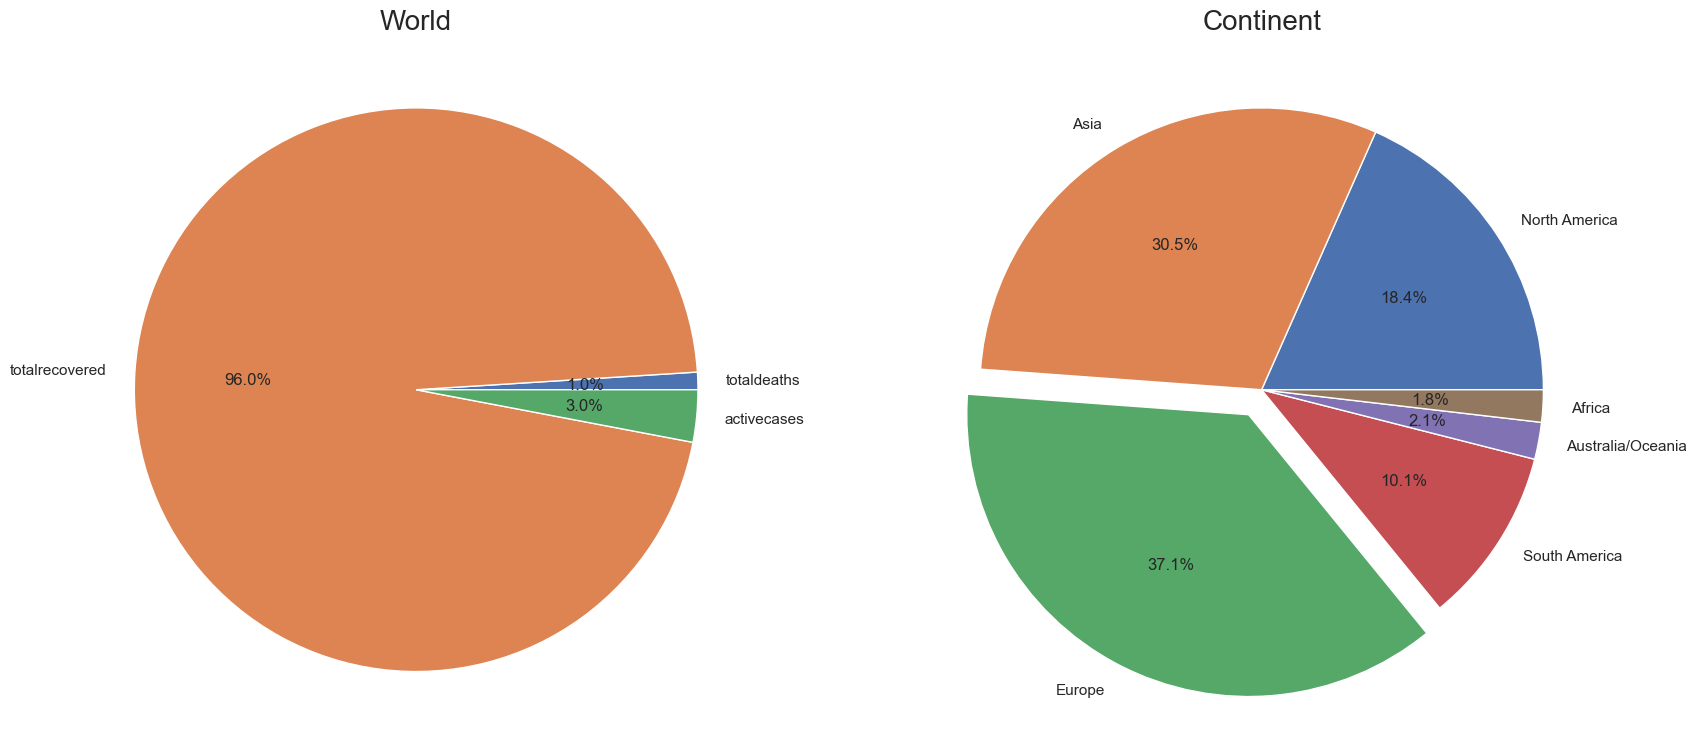

In [274]:
explode = (0,0,0.1,0,0,0)
lables = ['totaldeaths', 'totalrecovered', 'activecases']
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].set_title("World", fontsize=20)
ax[0].pie(df_world['percent'][1:] , labels = lables, autopct='%1.1f%%');
ax[1].set_title("Continent", fontsize=20)
ax[1].pie(df['percent1'].loc[:5] , labels = df['continent'].loc[:5], explode=explode, autopct='%1.1f%%');

- Từ biểu đồ trái, ta thấy được:
    - Số ca hồi phục chiếm phầm trăm cao nhất trong biểu đồ, điều đó cho chứng mình rằng y tế được cải thiện rất nhiều so với những năm trước với 96%. 
    - Còn lại là đang hồi phục chiếm tỉ trọng là 3%.
    - 1% là tỉ lệ không thể cứu chữa được.
- Ở biểu đồ bên phải là biểu đồ đi sâu vào phần độ hồi phục của từng châu lục, ta thấy các nước ở Asia, North America, Europe chiếm tỉ trọng cũng khá cao, lần luợt là: 30.5%, 18.4% và 37.1%, còn lại là các nước thuộc châu lục khác.


## 6.5. Câu hỏi số 5 <a name = "section6_5"></a>
[Quay về mục lục](#TOC)

---

# **7. Đôi điều về đồ án** <a name = "section7"></a>
[Quay về mục lục](#TOC)

---

# **8. Nguồn tham khảo** <a name = "section8"></a>
[Quay về mục lục](#TOC)